**this is a template notebook for Assignment 2 on Clustering. To get a 60 you will need to complete chapter 1 and 2.
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# <span style ='background:yellow'>Assignment 5
Author: <span style='background:yellow'>Mohaymen Sameen</span><br>
Student number: <span style='background:yellow'>627650</span><br>
Date: <span style='background:yellow'>23-05-2021</span>

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* **Sklearn and others**

From these we will need the following libraries:

In [1]:
# enter here all those 'from .... import ....'
!pip install decision-tree-id3
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.svm import SVC # "Support vector classifier"
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# 1. The Data
We are going to use the datafile **<span style ='background:yellow'>Stars.csv</span>**. This contains data from **<span style ='background:yellow'>differet stars and can possibly predict the star type</span>**.

In [2]:
#Reading stars.csv
my_data = pd.read_csv("Stars.csv", sep=',', skipinitialspace=True) 

Here's a quick look at the data:

In [3]:
#Displaying first 5 rows
my_data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


**<span style ='background:yellow'>**ATTRIBUTES:**
**Temperature** -- K,
**L** -- L/Lo (Luminosity),
**R** -- R/Ro (Radius),
**AM** -- Mv (Absolute Magnitude),
**Color** -- General Color of Spectrum,
**Spectral_Class** -- O,B,A,F,G,K,M / SMASS - https://lweb.cfa.harvard.edu/~pberlind/atlas/htmls/note.html#:~:text=The%20spectral%20types%20and%20sub,%22color%22%20and%20surface%20brightness.,
**Type** -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants

**Type**
from 0 to 5

Red Dwarf - 0
Brown Dwarf - 1
White Dwarf - 2
Main Sequence - 3
Super Giants - 4
Hyper Giants - 5

Variables:
**Type** (The outcome variable 'y')
**L (Luminosity), R(Radius)** (predictor variables 'x')</span>

*note:* Its easiest if your independent x variables are numeric.

The categorical dependent variable <span style ='background:yellow'>Type</span> has the following categories: **Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants** 

In [4]:
# Different Categories for the Types (Y-variable)
my_data["Type"]=pd.Categorical(my_data["Type"])
my_data["Type"].cat.categories

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

We'll also need some training and testing data, so:

In [5]:
# code to split data in training and testing
x = np.array(my_data["L"])
y = np.array(my_data["Type"])
xRes = x.reshape((-1,1))
yRes = y.reshape((-1,1))

xRes_train, xRes_test, yRes_train, yRes_test = train_test_split(xRes, yRes, test_size=0.4, random_state=101)

All set, lets try to predict this using our independent variable **<span style ='background:yellow'>Luminosity</span>**

# 2. The Basic Classification Models

In the Jupyter Notebook from lecture 5 a few different Clustering techniques were discussed. Lets explore how these perform on the data.

Before we look at some 'real' models, its a good idea to get a baseline in by using one or more of the dummy classifiers. Lets see how they perform:

In [6]:
#Dummy Classifier - Most Frequent

dumMF = DummyClassifier(strategy='most_frequent')
dumMF = dumMF.fit(xRes_train, yRes_train)
y_pred = dumMF.predict(xRes_test)
print(metrics.accuracy_score(yRes_test, y_pred))
print(confusion_matrix(yRes_test, y_pred))

0.10416666666666667
[[ 0  0  0  0 20  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0 19  0]]


In [7]:
#Dummy Classifier - Stratified
dumSrat = DummyClassifier(strategy="stratified")
dumSrat = dumSrat.fit(xRes_train, yRes_train)
y_pred = dumSrat.predict(xRes_test)
print(metrics.accuracy_score(yRes_test, y_pred))
print(confusion_matrix(yRes_test, y_pred))

0.13541666666666666
[[2 4 8 3 2 1]
 [1 3 3 2 1 2]
 [3 2 3 2 3 1]
 [0 3 7 2 3 6]
 [3 2 0 2 1 2]
 [0 2 6 5 4 2]]


In [8]:
#Dummy Classifier - Prior
dumPrior = DummyClassifier(strategy="prior")
dumPrior.fit(xRes_train, yRes_train)
y_pred = dumPrior.predict(xRes_test)
print(metrics.accuracy_score(yRes_test, y_pred))
print(confusion_matrix(yRes_test, y_pred))

0.10416666666666667
[[ 0  0  0  0 20  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0 19  0]]


In [9]:
#Dummy Classifier - Uniform
dumUni = DummyClassifier(strategy="uniform")
dumUni.fit(xRes_train, yRes_train)
y_pred = dumUni.predict(xRes_test)
print(metrics.accuracy_score(yRes_test, y_pred))
print(confusion_matrix(yRes_test, y_pred))

0.14583333333333334
[[4 3 1 3 5 4]
 [3 1 0 6 1 1]
 [3 2 1 1 6 1]
 [5 2 2 4 6 2]
 [0 3 2 4 0 1]
 [4 1 4 5 1 4]]


**<span style ='background:yellow'>There are 4 classifier types. The first one is most frequent. This produces the most frequent label in the training set. The second one is stratified which generates predictions by respecting the training set's class distribution. The third one is prior which always predicts the class that maximizes the class prior. And finally the last one is uniform. This method generates predictions uniformly at random. For each dummy classifier type, there are accuracy scores to show how accurate the prediction is and the confusion matrixes displays the performance of each classifier. Prior has the same results as most frequent as it looks at the prior results. The "most frequent's" confusion matrix displays the prediction of the type of star using luminosity.</span>**

So, those are our 'baseline'. A model should be able to at least outperform these.

Lets dive in...

## 2.1. Naive Bayes

The first model discussed was the Naive Bayes model. 

**<span style ='background:yellow'>Naive Bayes is a supervised learning algorithm based on applying the Bayes’ theorem with the assumption of independency between the features or class variables. It works by using Bayes' theorem and is useful for calculating condional probabilities. The formula is: P(A|B)= (P(B|A) x P(A))/P(B), using this formula you can calculate the probability of A based on the probability of B</span>**

Lets create and fit this model:

In [49]:
# Set our model to this GaussianNB
gaussNB = GaussianNB()

#Getting the specific fields to use
mDat =my_data[["L", "R", "Type"]]

# Setting input and output
X = mDat[["L", "R"]]
y = mDat["Type"]

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)


#Creating the model and prediction
gaussNB.fit(X_train, y_train)
y_pred = gaussNB.predict(X_test)

Now to measure its performance:

In [50]:
#Accuracy score and confusion matrix
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.5625
[[ 0  9  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  2  0  4  0  0]
 [ 0  0  0  1  6  0]
 [ 0  0  0  0  0 12]]


**<span style ='background:yellow'>We got a 56% accuracy rating which shows the accuracy of our predictions on our new model. The numbers which you see on the confusion matrix show the prediction of the luminosity and radius and how many times they were correctly predicted and the ones which predicted it wrong. As you can see, this is a remarkable difference compared to the dummy classifiers. We were mostly getting around the 10% to 20% range most of the time. But now using the naive bayes method, our model got a much more accurate prediction of 56%.</span>**

Lets also have a look at what a prediction would be. If the **<span style ='background:yellow'>Luminosity<span>** has a score of **<span style ='background:yellow'>9</span>** and the **<span style ='background:yellow'>Radius</span>** has a score of **<span style ='background:yellow'>12</span>**, then this model will predict:

In [52]:
#Prediction 
(9+12)/(9+5+2+12)

0.75

That's about it for NB. A nice thing about NB is that it doesn't really require any parameters. Lets look at our next technique.

## 2.2. Support Vector Machines
The second model discussed were Support Vector Machines. There is a plural here, because we can use different kernels.

**<span style ='background:yellow'>Support vector machines is also another supervised machine learning algorithm that analyses data for predictions for classification. It works by using classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text. </span>**

The basic kernel is the linear one, so we'll attempt that first:

In [13]:
# code to create the model, and fit the data.
svmLin = SVC(kernel='linear')
svmLin.fit(X_train, y_train)
y_pred = svmLin.predict(X_test)

Measuring its performance....

In [14]:
# code to show its accuracy score AND confusion matrix.
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.875
[[ 7  0  2  0  0  0]
 [ 2  3  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0  5  1  0]
 [ 0  0  0  1  6  0]
 [ 0  0  0  0  0 12]]


**<span style ='background:yellow'>\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers, and the NB?>You might have noticed that the accuracy score is way higher than those of the dummy classifiers as well as the Naive bayes. The dummy classifiers were in the range of 10% to 20%, the naive bayes was 56%. Now the the support vector machine model gives us an accuracy score of 88%, much higher than the rest of them. The numbers you see in the confusion matrix tell you the diagonals and how much seperation there is between them. You can probably see that one diagonal has most of the scores/counts while the others have almost zero counts or scores.</span>**

Lets do the same for the other kernels that were discussed, i.e. rbf, polynomial, and sigmoid.

In [15]:
# code to create the models, fit the data, and show its accuracy score AND confusion matrix.
# make sure to print some text between to indicate which result belongs to which model.

#rbf
rbfKer = SVC(kernel='rbf')
rbfKer.fit(X_train, y_train)
y_pred = rbfKer.predict(X_test)

print('RBF results')
print('accuracy score: ', metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

RBF results
accuracy score:  0.22916666666666666
[[ 0  9  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  5  0  0  1  0]
 [ 0  0  0  0  6  1]
 [ 0  0  0  0 12  0]]


In [16]:
#Polynomial Kernel
svmPol = SVC(kernel='poly')
svmPol.fit(X_train, y_train)
y_pred = svmPol.predict(X_test)

print('Polynomial results')
print('accuracy score: ',metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Polynomial results
accuracy score:  0.22916666666666666
[[ 0  9  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  5  0  0  1  0]
 [ 0  1  0  0  6  0]
 [ 0  2  0  0 10  0]]


In [17]:
#Sigmoid Kernel
svmSigm = SVC(kernel='sigmoid')
svmSigm.fit(X_train, y_train)
y_pred = svmSigm.predict(X_test)

print('accuracy score: ', metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy score:  0.2916666666666667
[[0 9 0 0 0 0]
 [0 5 0 0 0 0]
 [0 9 0 0 0 0]
 [0 5 0 0 0 1]
 [0 0 0 0 4 3]
 [0 0 0 0 7 5]]


**<span style ='background:yellow'>We have now used 4 types of support vector machines, linear, RBF aka(Radial Basis Function), polynomial and sigmoid. Out all of them, linear worked best, which means that the data is mostly split in sections where it can be cut by diagonals. RBF and polynomial have similar results of 23% and sigmoid being 29%. All of these methods still perform much better than the dummy classifiers.</span>**

Allright, lets move on to the third technique...

## 2.3. K-Nearest Neighbors
The third technique is the K-Nearest Neighbors (KNN). 

**<span style ='background:yellow'>The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. The KNN algorithm works by assuming that similar things exist in close proximity. In other words, similar things are near to each other.</span>**

To use this we need to do some additional steps.

First we need to normalize our x variables:

In [18]:
# use the StandardScaler to normalize the two x variables

# setting the scaler
scaler = StandardScaler()
scaler.fit(X_train)

# Convert the train and test X values, using the same scaler (so based on the X_train)
X_trainScaled = scaler.transform(X_train)
X_testScaled = scaler.transform(X_test)

Second we need to determine how many neighbors (k) we want. To do this we'll visualize the results using different values for k.

Text(0, 0.5, 'Error Rate')

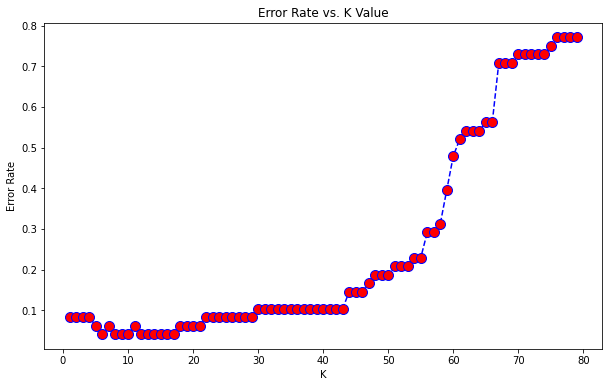

In [19]:
# Code to create the graph with Error Rate vs. K-values.

#I got 14 by checking the shape for the X_train set to the power of 0.5
knn = KNeighborsClassifier(n_neighbors=14)

error_rate=[]
for i in range(1,80):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainScaled, y_train)
    pred_i = knn.predict(X_testScaled)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,80),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**<span style ='background:yellow'>As you can probably see from the graph, the error rate is low at around 0.1-0.15 and the k-range from 0 to 43. After 43 K, the error rate starts to spike up to about 0.78 error rate. We can choose K = 7 since it is the first K with the lowest error rate</span>**

*Note:* +0.5 if you also use the GridSearch technique to decide on k.

In [20]:
#Lets use a grid search to decide on K as well.

## List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
##Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
##Create new KNN object
knn_2 = KNeighborsClassifier()
##Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
##Fit the model
best_model = clf.fit(X_trainScaled, y_train)
##Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


Now that we know what we want k to be, we can create the model.

In [21]:
# code to create the model with the selected k
# The result for the gridsearch technique was a leaf size of 1, p of 1 and 1 neighbors
knnOptimal = KNeighborsClassifier(n_neighbors=1, leaf_size=1, p=1)
y_pred=knn.predict(X_testScaled)

Lets find out how good it is:

In [22]:
# code to show its accuracy score AND confusion matrix.
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.22916666666666666
[[9 0 0 0 0 0]
 [4 1 0 0 0 0]
 [9 0 0 0 0 0]
 [0 5 0 1 0 0]
 [0 0 0 7 0 0]
 [0 0 0 4 8 0]]


**<span style ='background:yellow'>After selecting our k nearest neighbor of 1 and fitting it into our model,we got an accuracy score of 23 percent. It is still higher than all the dummy classifiers and the sigmoid. But the result is exactly the same as the RBF and polynomial support vectors. Also it performs worse than the naive bayes which had an accuracy score of 56%.  </span>**

One more basic technique to go.

## 2.4. Decision Trees
The last technique that was discussed in detail, were the Decision Trees. 

**<span style ='background:yellow'>Decision trees is a supervised machine learning algorithm that can be used for classification or regression methods. Decision trees use multiple algorithms to decide to split a node into two or more other sub-nodes. The creation of these sub-nodes increases the Uniformity of the resultant sub-nodes.</span>**

The following variations were discussed:

* ID3 (or entropy with sklearn)
* Gini
* Random Forest
* Extra trees

Hopefully we have the hang of this now, so lets do each of them in one go:

In [23]:
# code to create the models, fit the data, and show its accuracy score AND confusion matrix.
# make sure to print some text between to indicate which result belongs to which model.

#importing six and sys
import six
import sys
sys.modules['sklearn.externals.six'] = six
# then finally id3
from id3 import Id3Estimator


#ID3 
id3_dtc=Id3Estimator()
id3_dtc.fit(X_trainScaled,y_train)
y_pred = id3_dtc.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.5208333333333334
[[ 0  9  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  2  5  0]
 [ 0  0  0  0 12  0]]


In [24]:
#Gini
gini_dtc = DecisionTreeClassifier(criterion = "gini")
gini_dtc.fit(X_trainScaled,y_train)
y_pred = gini_dtc.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8958333333333334
[[ 7  2  0  0  0  0]
 [ 1  4  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  2  5  0]
 [ 0  0  0  0  0 12]]


In [25]:
#Random Forest
rfc = RandomForestClassifier(random_state=0)
rfcModel = rfc.fit(X_trainScaled, y_train)
y_pred = rfcModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9166666666666666
[[ 7  2  0  0  0  0]
 [ 1  4  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  1  6  0]
 [ 0  0  0  0  0 12]]


In [26]:
#Extra trees
erfc = ExtraTreesClassifier(random_state=0)
erfc = erfc.fit(X_trainScaled, y_train)
y_pred = erfc.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9583333333333334
[[ 7  2  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  0 12]]


**<span style ='background:yellow'>Alright so after having a look at the different variations of decision trees, we can clearly see an incredibly high accuracy score for most of the variations. The worst one is ID3 scoring a 52%. As we move on to Gini, Random Forest and Extra trees, we start to get really high accuracy scores. For Gini we get an accuracy score of 90%. For Random forest, we get an accuracy score of 92% and finally for the last variation which is also the best performing model so far is the extra trees variation scoring a 96%. For gini, random forest and extra trees, the accuracy score outperforms every other classification algorthim so far.</span>**

One last set of techniques to explore.

## 2.5. Other Models
In the Jupyter Notebook from the lecture, in chapter 5.4 a few more techniques were simply shown:

* Linear Discriminant Analysis
* Quadratic Discriminant Analysis
* Logistic Regression Classifier
* Multinomial Logistic Regression Classification
* Adaptive Boosting
* Gradient Boosting
* Histogram Gradient Boosting
* XGBoost
* Stacking

Out of curiousity lets see how these perform.

In [ ]:
# code to create the models, fit the data, and show its accuracy score (the confusion matrix is here optional).
# make sure to print some text between to indicate which result belongs to which model.
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
ldaModel=lda.fit(X_trainScaled, y_train)
y_pred=ldaModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
#Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qdaModel=qda.fit(X_trainScaled, y_train)
y_pred=ldaModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
lrModel = logreg.fit(X_trainScaled, y_train)
y_pred = lrModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
#Multinomial Logistic Regression Classification
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='multinomial')
lrModel = logreg.fit(X_trainScaled, y_train)
y_pred = lrModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
#Adaptive Boosting
from sklearn.ensemble import AdaBoostClassifier

adaBst = AdaBoostClassifier(random_state=0)
adaBst = adaBst.fit(X_trainScaled, y_train)
y_pred = adaBst.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gradBst = GradientBoostingClassifier(random_state=0)
gradBst = gradBst.fit(X_trainScaled, y_train)
y_pred = gradBst.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
#Histogram Gradient Boosting
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

histBst = HistGradientBoostingClassifier(random_state=0)
histBst = histBst.fit(X_trainScaled, y_train)
y_pred = histBst.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
#XGBoost
!pip install xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_trainScaled, y_train)
y_pred = xgb.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
#Stacking
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))]

stackCl = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())
stackCl.fit(X_trainScaled, y_train)
y_pred = stackCl.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

**<span style ='background:yellow'>After trying other models and techniques, we also got some pretty impressive results. From all of the new techniques used, the technique with the highest accuracy score was Histogram Gradient Boosting. There were some that also had the same accuracy scores such as Stacking and Gradient boosting that scored an 90%.Linear Discriminant Analysis, Quadratic Discriminant Analysis, Logistic Regression Classifier and Multinomial Logistic Regression Classification had the same score of 48% </span>**

<font size="5"><center>-----Chapters 1 and 2 are required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 3. Visualisation

With two input parameters we can actually determine visually where a model will classify a variable into which category. An overview of such plots is shown at https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

We cannot copy that code since it does a comparison. What we want is a function that takes the X and Y data as input, as well as the model to be used and then shows the decision areas.

In [ ]:
# the code for the function


In [ ]:
# an example of using the function


# 4. Categorical Input
With classification we have a categorical output variable, but what if we also have one or more categorical input variables.

One popular technique is one-hot-encoding, but there are others.

In this chapter we'll discuss **<span style ='background:yellow'>\<your chosen technique></span>**.

**<span style ='background:yellow'>\<explain the technique in detail. What does it do and how does it work></span>**

In [ ]:
# example code of using this technique


# 5. Performance
Some models get higher accuracy scores than others. In the Jupyter Notebook from the lecture the UFC data was used and the QDA had the highest accuracy score: 0.6747. The big question is, can it be done better? First areas to look for improvement are to simply increase the number of input variables, or tweak some parameters of some of the models, or a combination of both.

In this chapter we'll give it an attempt.

First we need to load the data:

In [ ]:
# code to load the UFC data


**<span style ='background:yellow'>\<explain your attempt, what did you do.></span>**

In [ ]:
# code that will generate an accuracy score for the outcome that is higher than 0.6747


# 6. A New Technique

Many techniques were discussed in class and the lecture Jupyter Notebook, but there are a lot more. In this chapter the \<your chosen new technique> is discussed.

**<span style ='background:yellow'>\<explain in detail this new technique. Note that other students should be able to understand it from your explanation alone!></span>**

In [ ]:
# code on using this technique


**<span style ='background:yellow'>\<feel free to use more cells for this, you probably need them></span>**